<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize wandb results

In [37]:
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/small_artifacts_06_10_22/files/media/images"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/test_results/vcg_19_ch_upsampled/files/media/images/"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/vcg_19_ch_upsampled/files/media/images"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/vcg_augmented_horiz_v3_500_epochs/files/media/images"
#path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/experiments/adapter_augmented_horiz_v4_500_epochs/files/media/images"
path = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix_dev/wandb/run-20221017_220111-2qsuenfj/files/media/images/"

In [35]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io

import os.path

%matplotlib inline

def plot_imgs(imgs, titles):
    """
    Generate visualization of list of arrays
    :param imgs: list of arrays, each numpy array is an image of size (width, height)
    :param titles: list of titles [string]
    """
    # create figure
    fig = plt.figure(figsize=(70, 70))
    # loop over images
    for i in range(len(imgs)):
        fig.add_subplot(4, 4, i + 1)
        plt.imshow(imgs[i])
        plt.title(str(titles[i]))
        plt.axis("off")
        
def return_list_of_matches(key, elements):
    """
    uses the key (identifier for each generated image) and 
    returns on a list all the elemets on the path that contain that key.
    In general should be Real A, Fake B, Real B
    """
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos

def plot_resultsv1(path,thr):
    idx =0
    for el in reversed(os.listdir(path)):
        print(el)
        if ".png" in el:
            matcher = el.split("_")[2]
            key = "_"+matcher+"_"
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["Real H&E", "Generated IF", "Real IF"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["Generated IF (Channel 0)", "Generated IF (Channel 3)", "Generated IF (Channel 17)"])
            plot_imgs([Real_B[:,:,0], Real_B[:,:,1], Real_B[:,:,2]], ["Generated IF (Channel 0)", "Generated IF (Channel 3)", "Generated IF (Channel 17)"])
            print(f"Range for HE]-> [{Real_A.min(), Real_A.max()}]")
            print(f"Range for IF]-> [{Real_B.min(), Real_B.max()}]")
            print(f"Range for Generated IF (stack)]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF Channel 0]-> [{Fake_B[:,:,0].min(), Fake_B[:,:,0].max()}]")
            print(f"Range for Generated IF Channel 3]-> [{Fake_B[:,:,1].min(), Fake_B[:,:,1].max()}]")
            print(f"Range for Generated IF Channel 17]-> [{Fake_B[:,:,2].min(), Fake_B[:,:,2].max()}]")
            idx+=1
            if idx ==thr:
                break

### Visualize validation data 
Improve to read same image all the time

real_B_2572_e0ef9e7f92065424828e.png
Aligned images:  ['real_A_2572_611d0a0f4161698a3132.png', 'fake_B_2572_0090c5e2891ba96ed5c6.png', 'real_B_2572_e0ef9e7f92065424828e.png']
Range for HE]-> [(0, 255)]
Range for IF]-> [(0, 255)]
Range for Generated IF (stack)]-> [(0, 255)]
Range for Generated IF Channel 0]-> [(0, 251)]
Range for Generated IF Channel 3]-> [(0, 255)]
Range for Generated IF Channel 17]-> [(0, 249)]
fake_B_2572_0090c5e2891ba96ed5c6.png
Aligned images:  ['real_A_2572_611d0a0f4161698a3132.png', 'fake_B_2572_0090c5e2891ba96ed5c6.png', 'real_B_2572_e0ef9e7f92065424828e.png']
Range for HE]-> [(0, 255)]
Range for IF]-> [(0, 255)]
Range for Generated IF (stack)]-> [(0, 255)]
Range for Generated IF Channel 0]-> [(0, 251)]
Range for Generated IF Channel 3]-> [(0, 255)]
Range for Generated IF Channel 17]-> [(0, 249)]
real_A_2572_611d0a0f4161698a3132.png
Aligned images:  ['real_A_2572_611d0a0f4161698a3132.png', 'fake_B_2572_0090c5e2891ba96ed5c6.png', 'real_B_2572_e0ef9e7f92065424828e

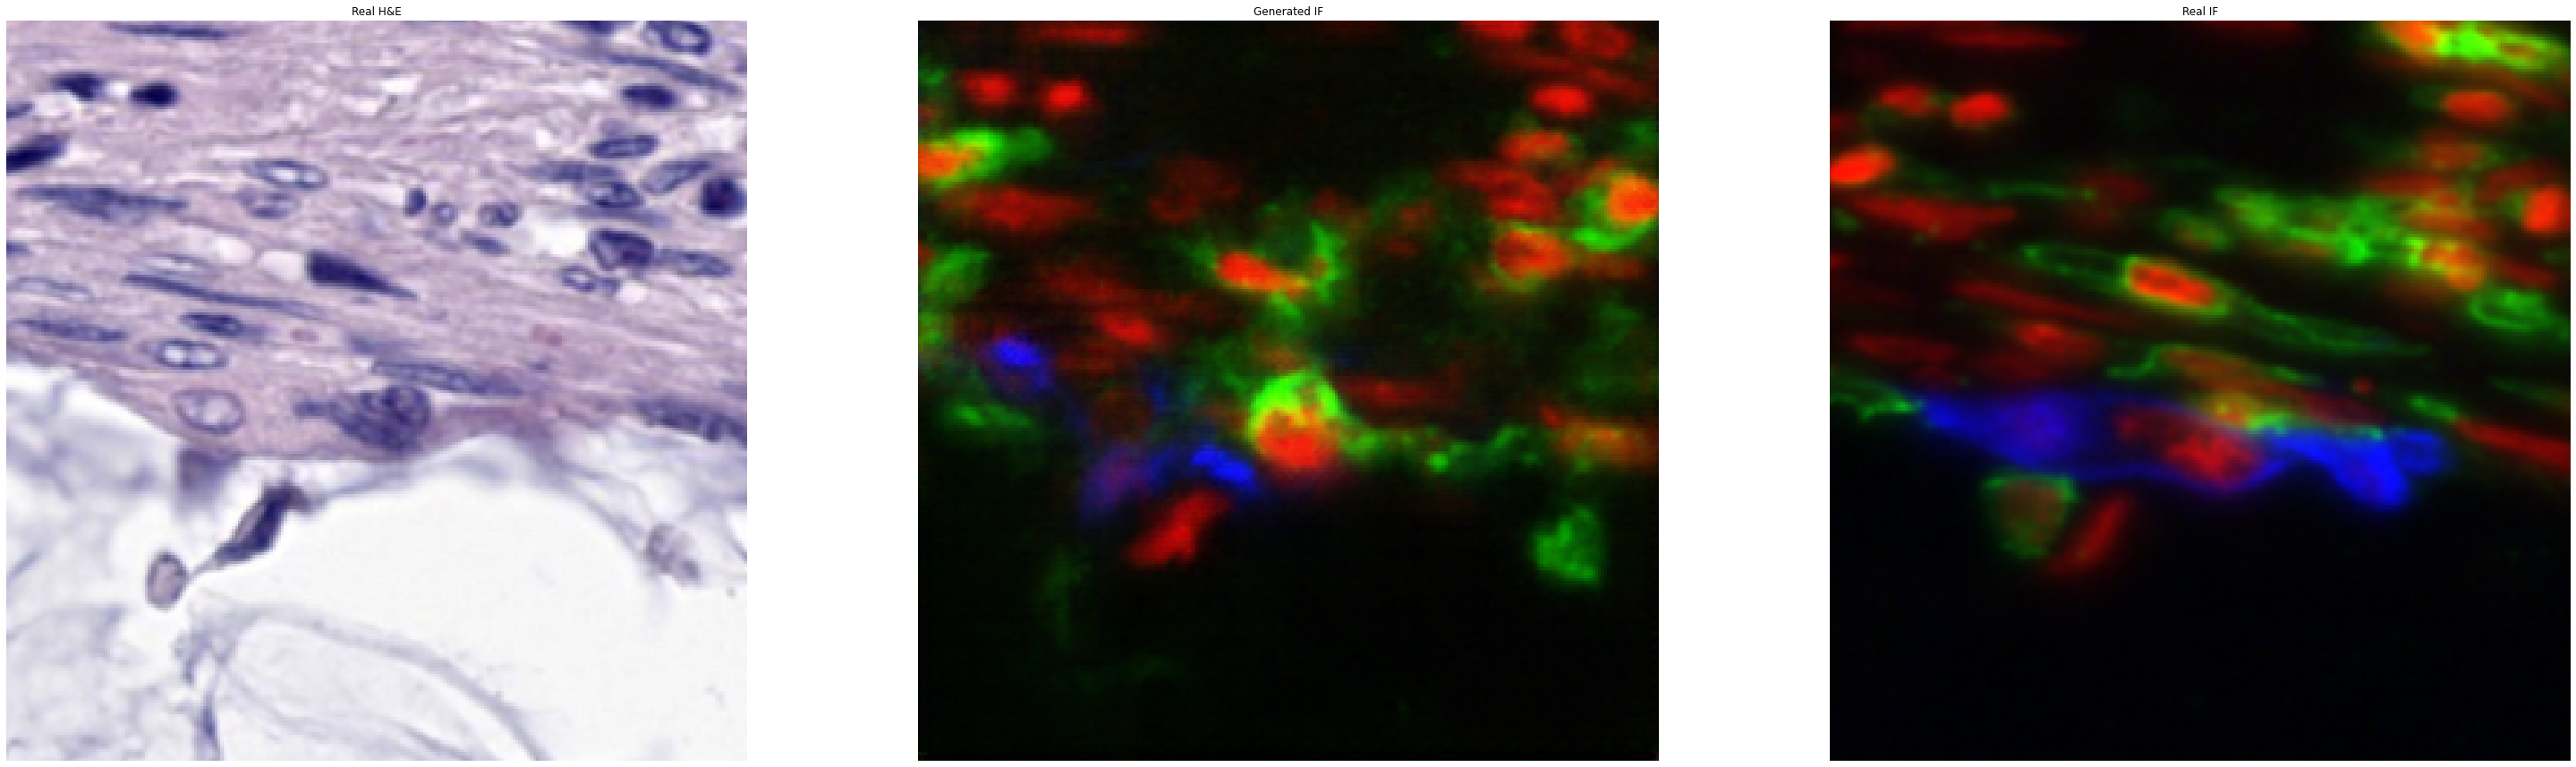

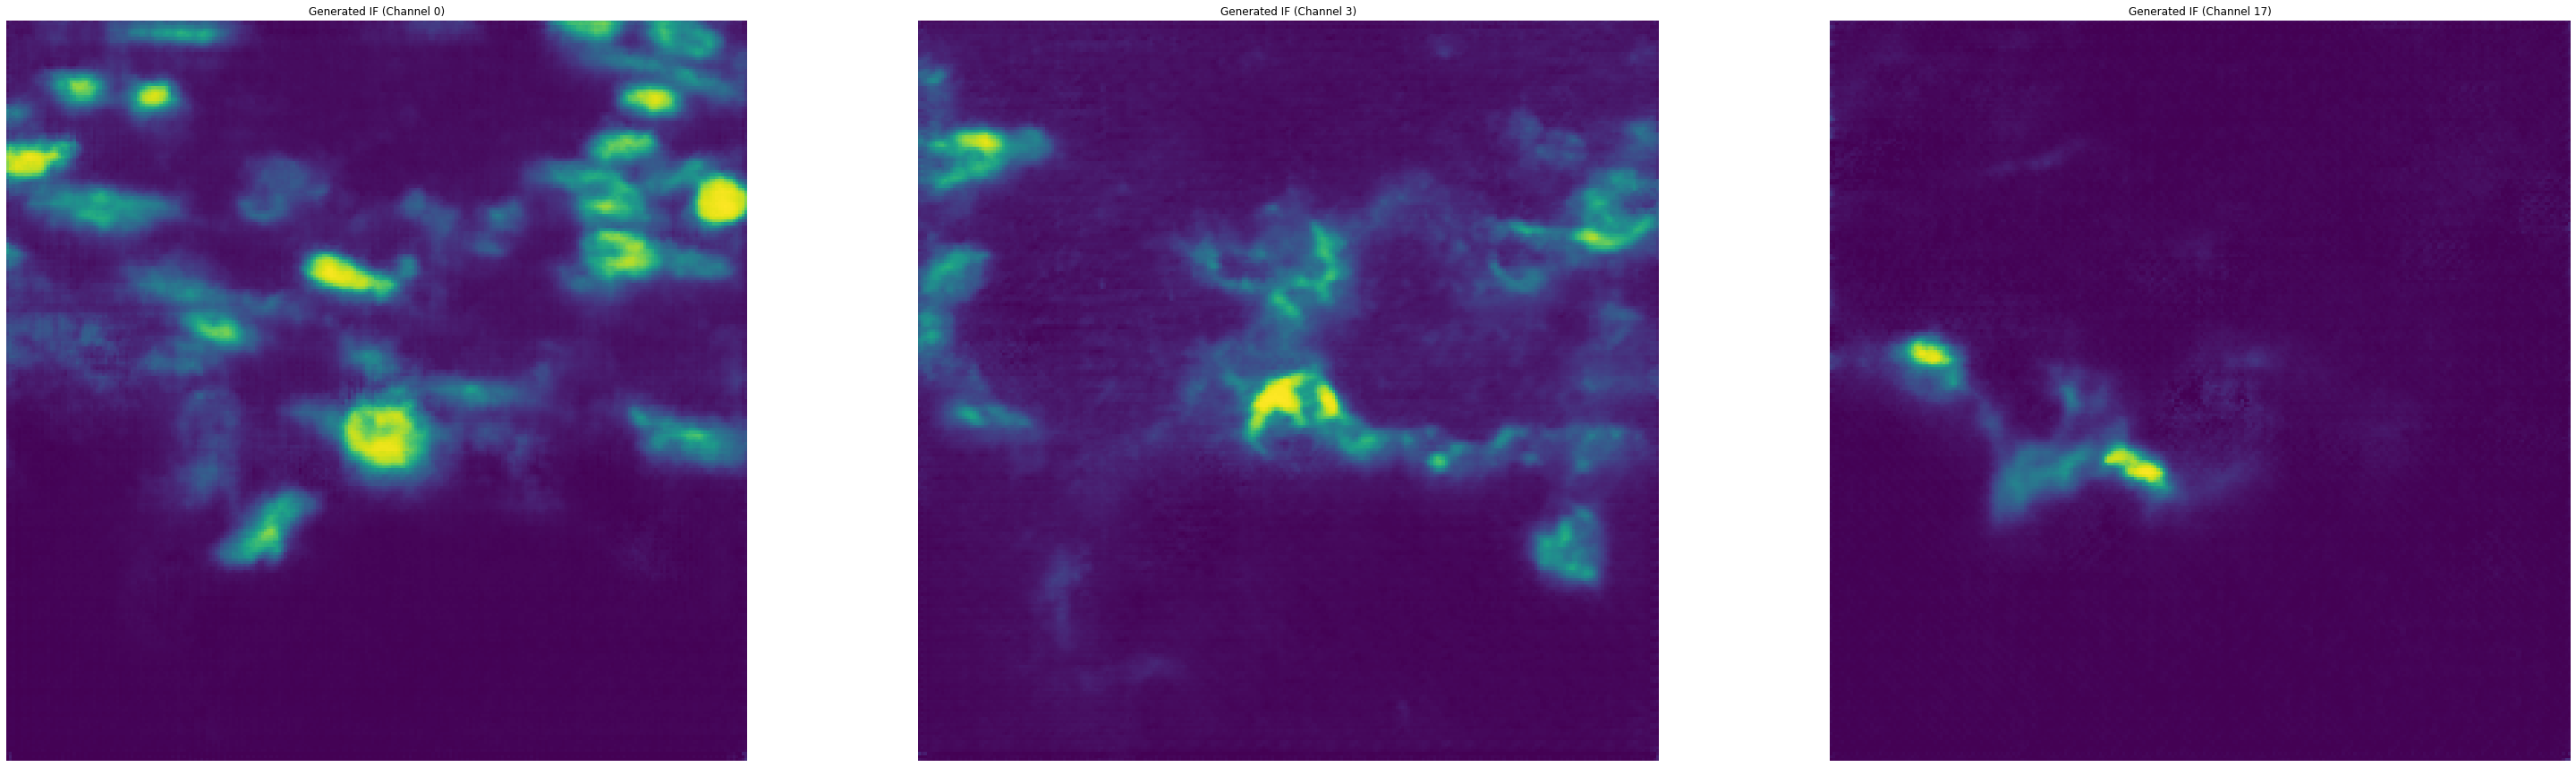

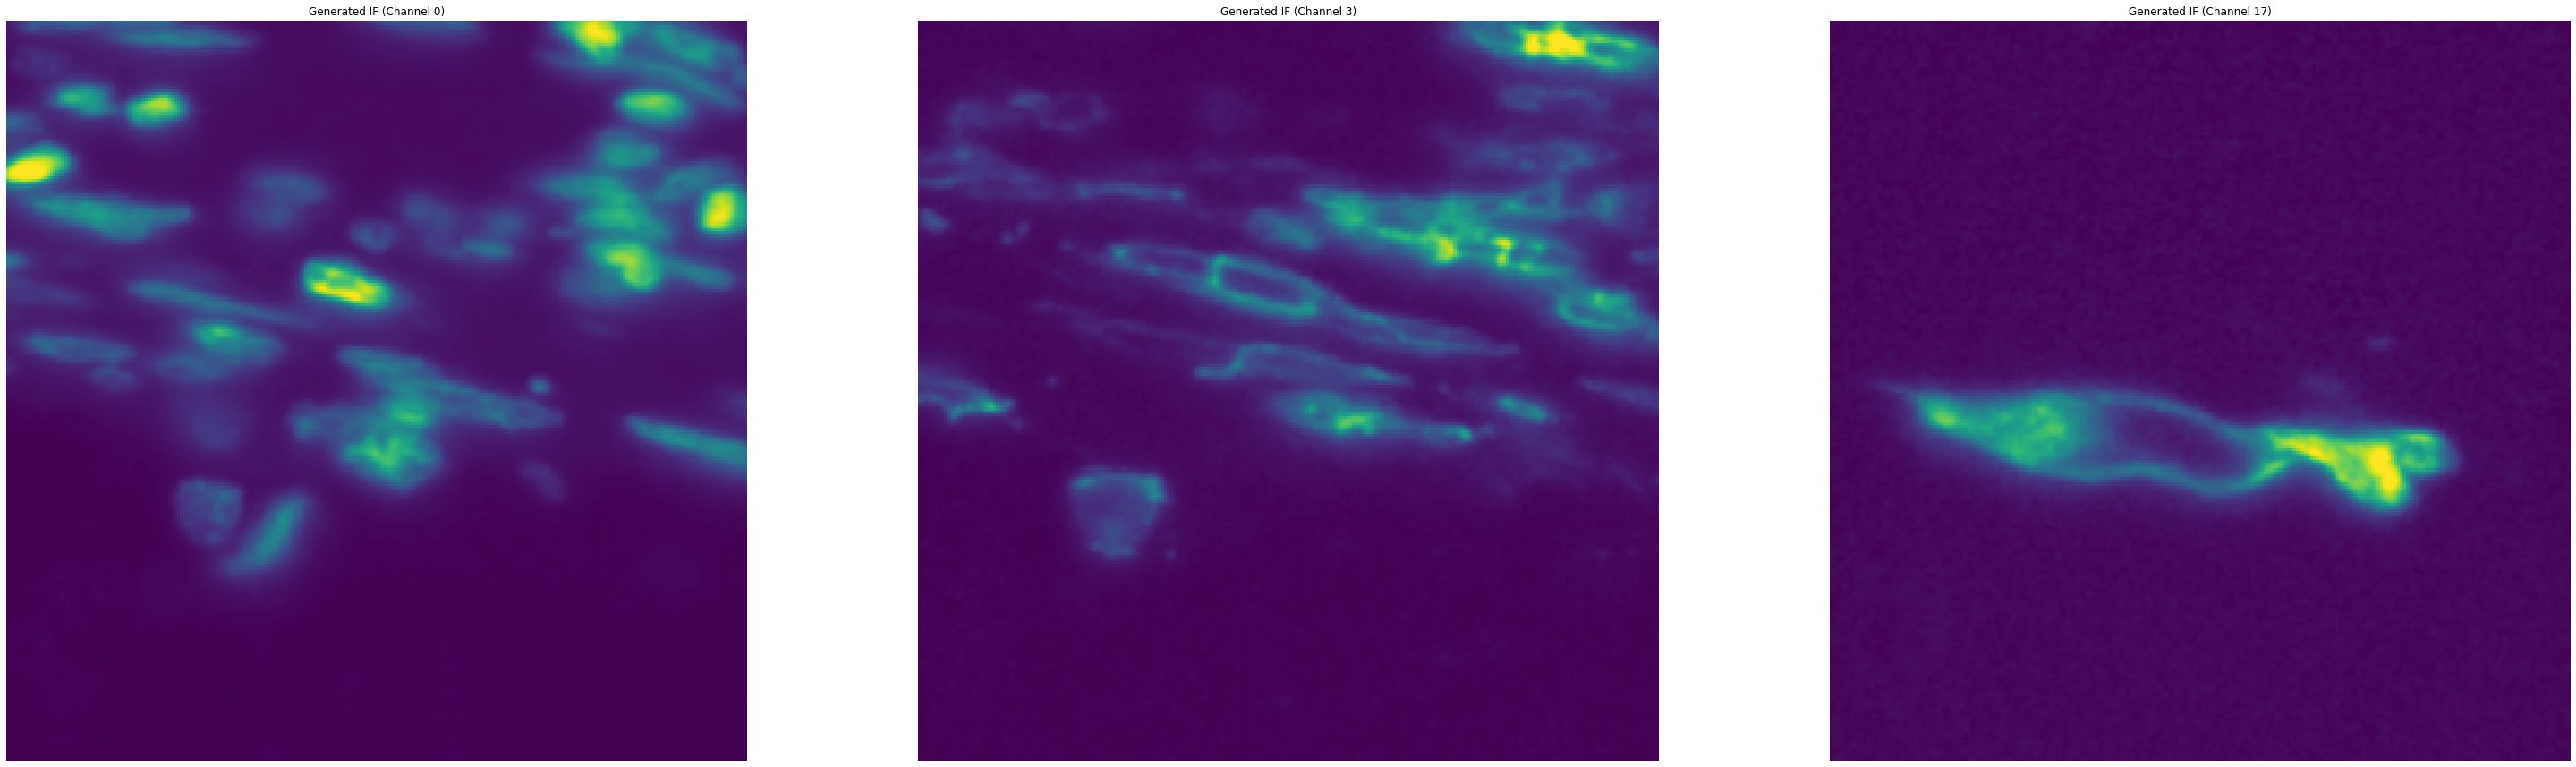

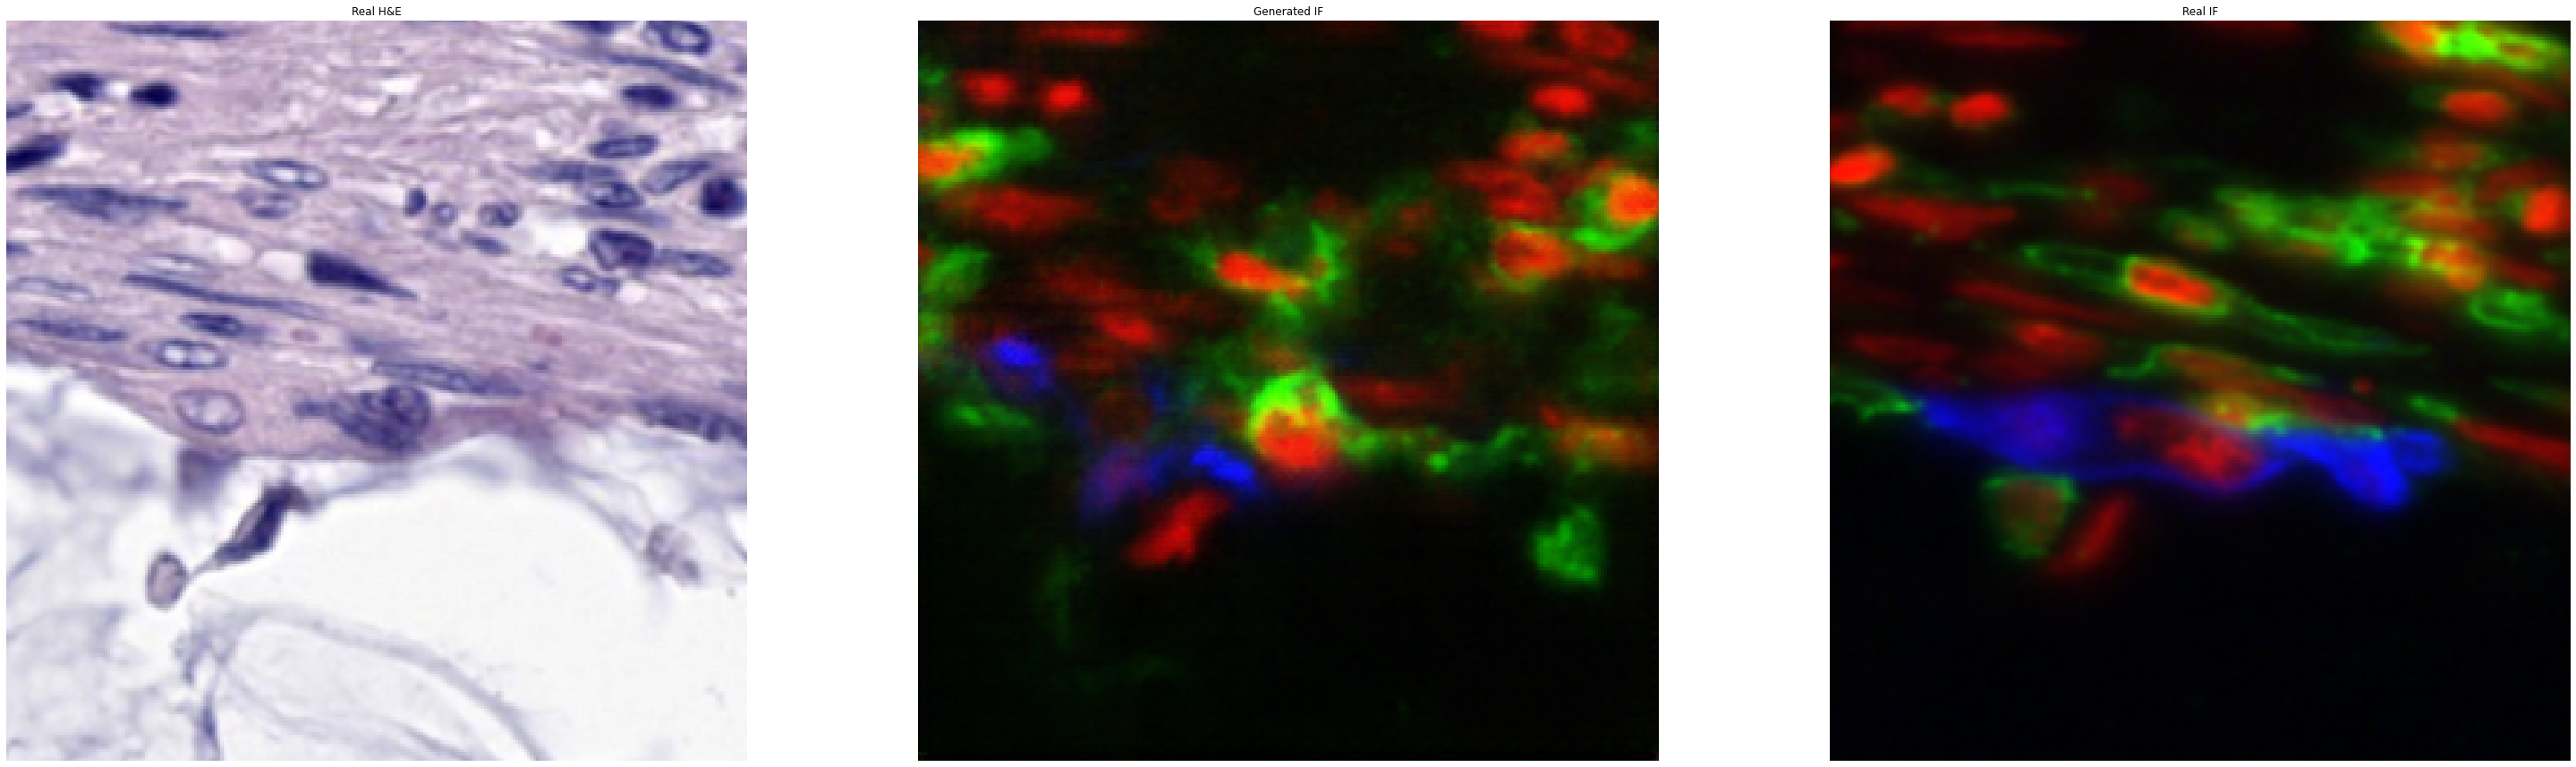

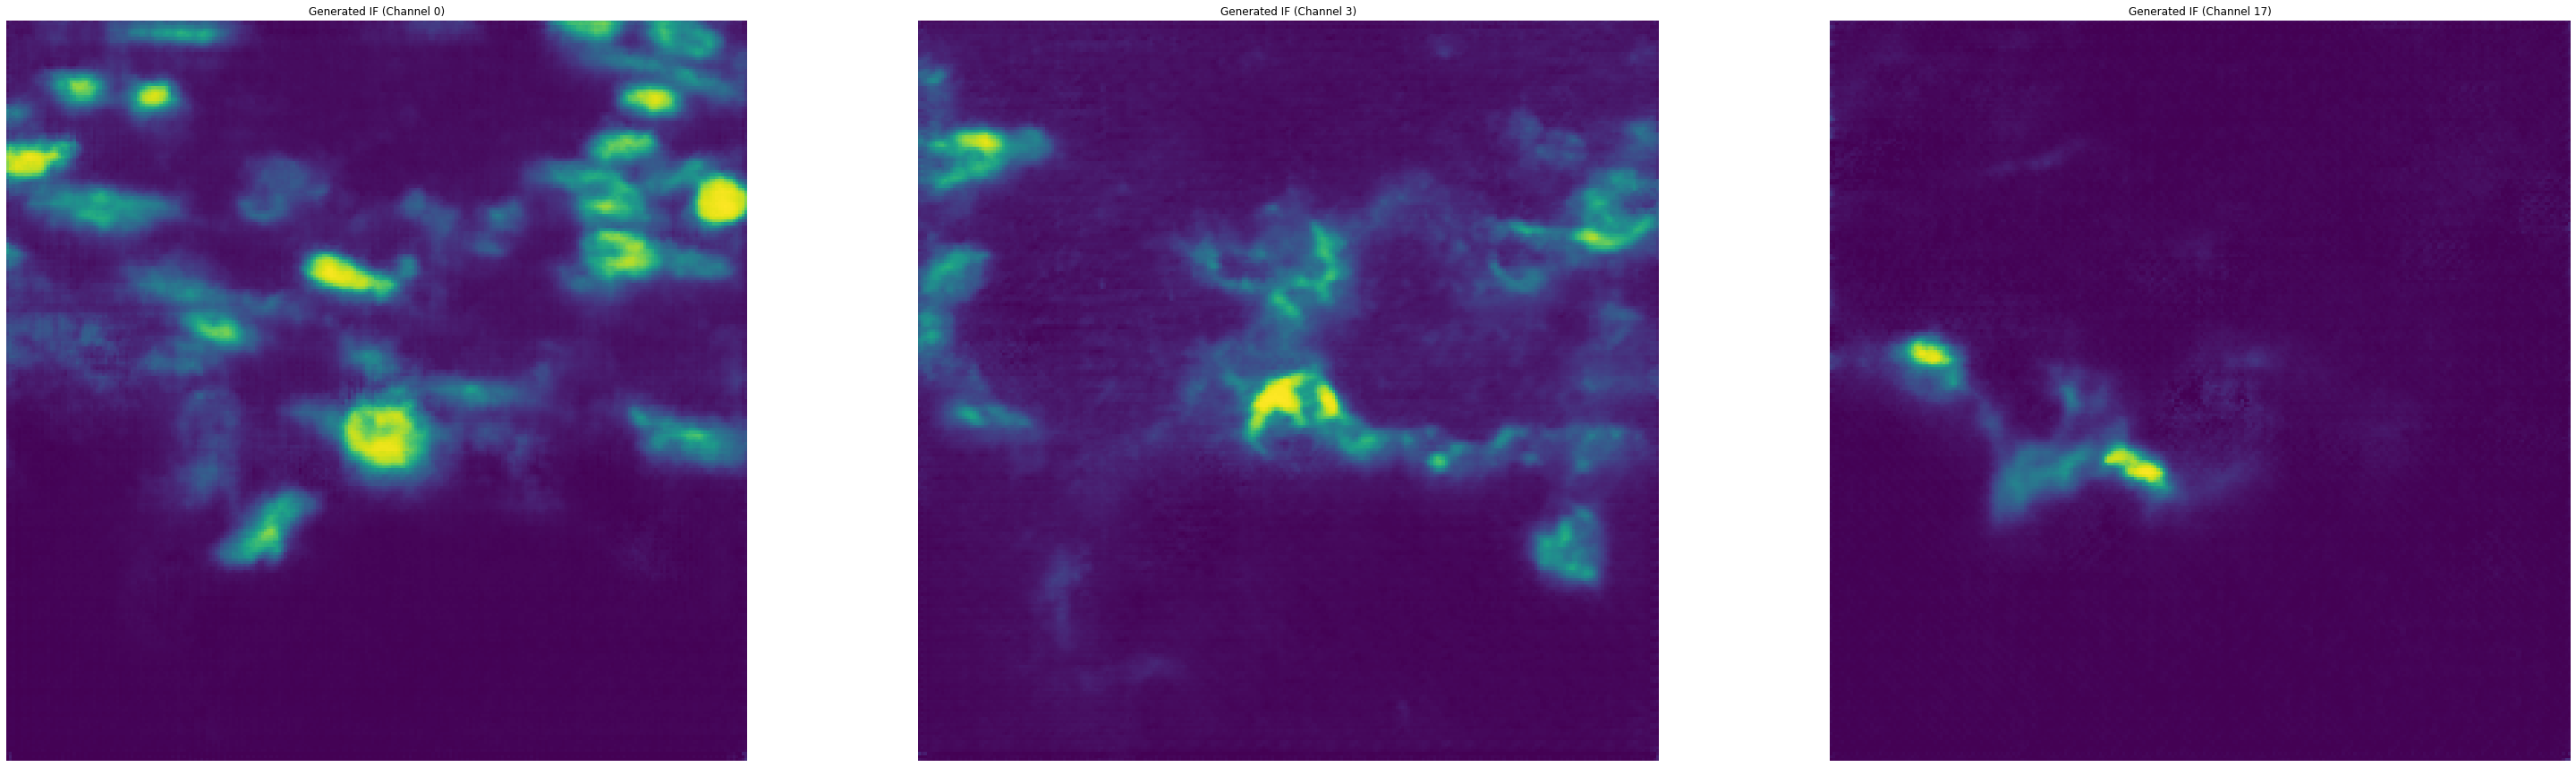

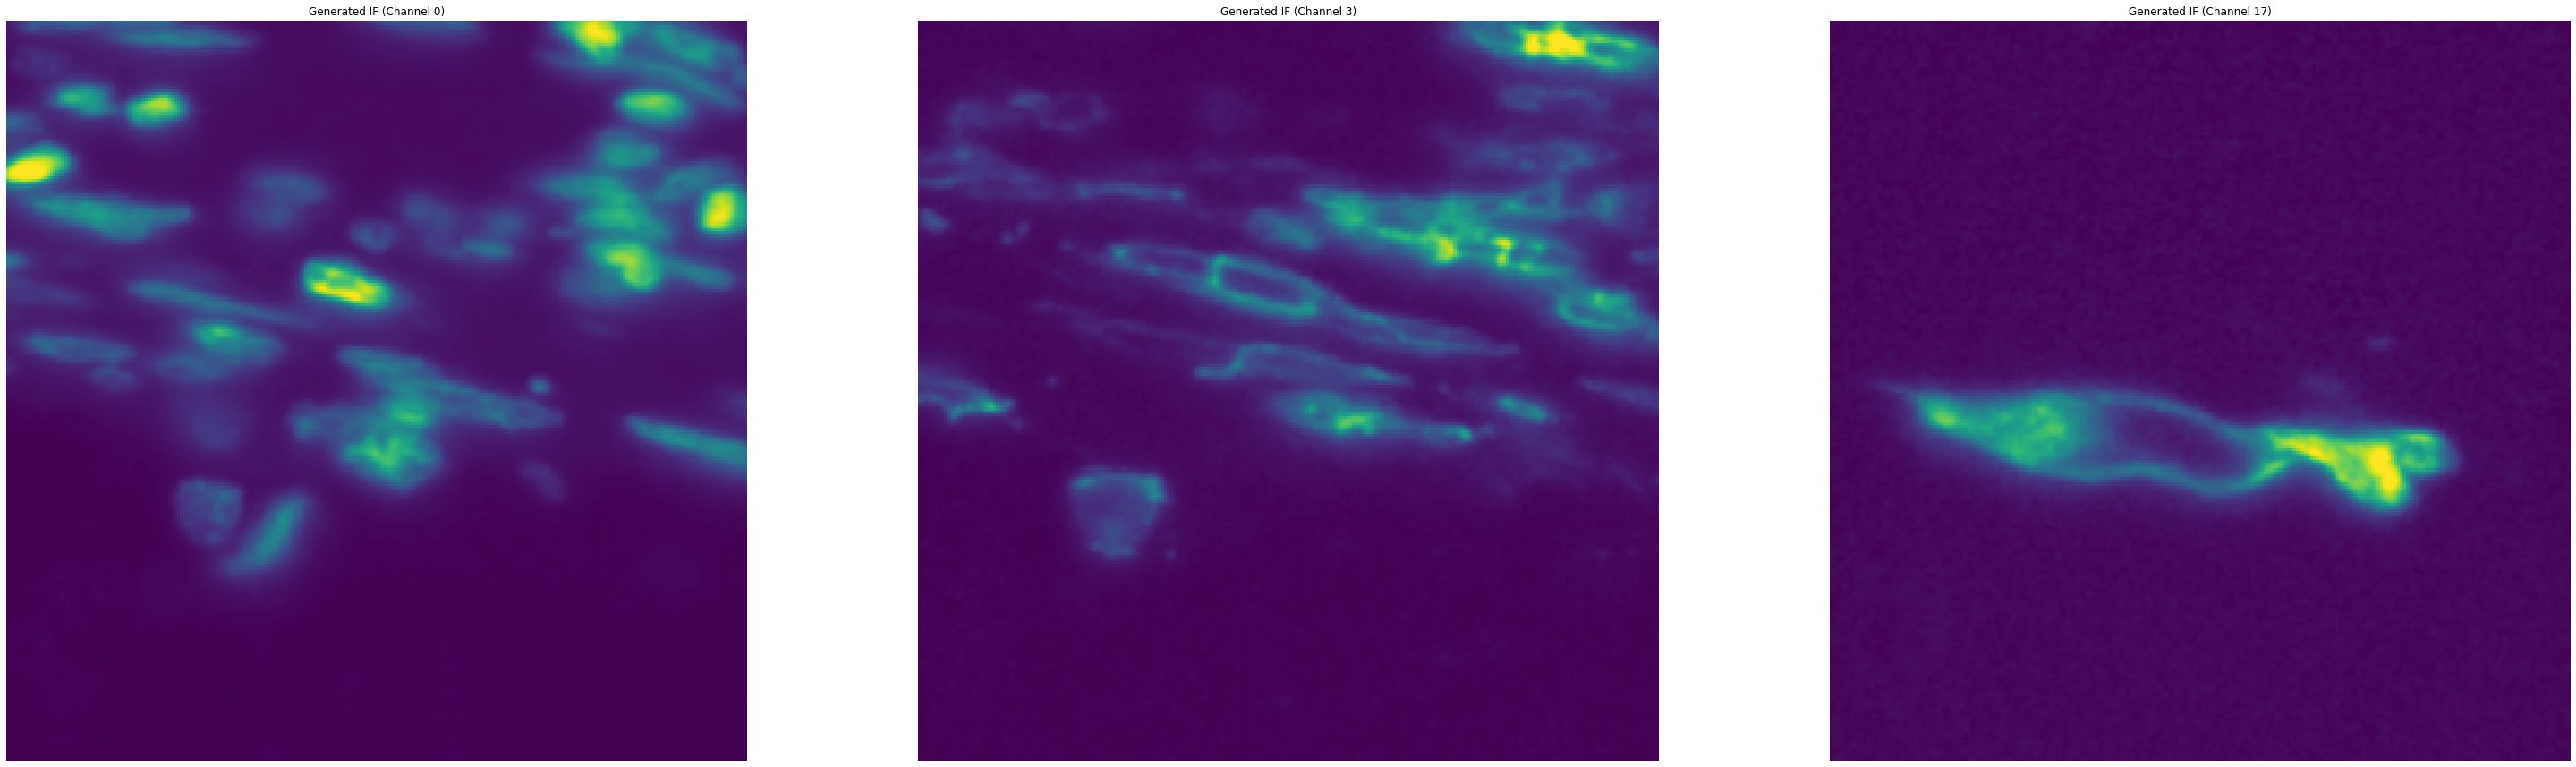

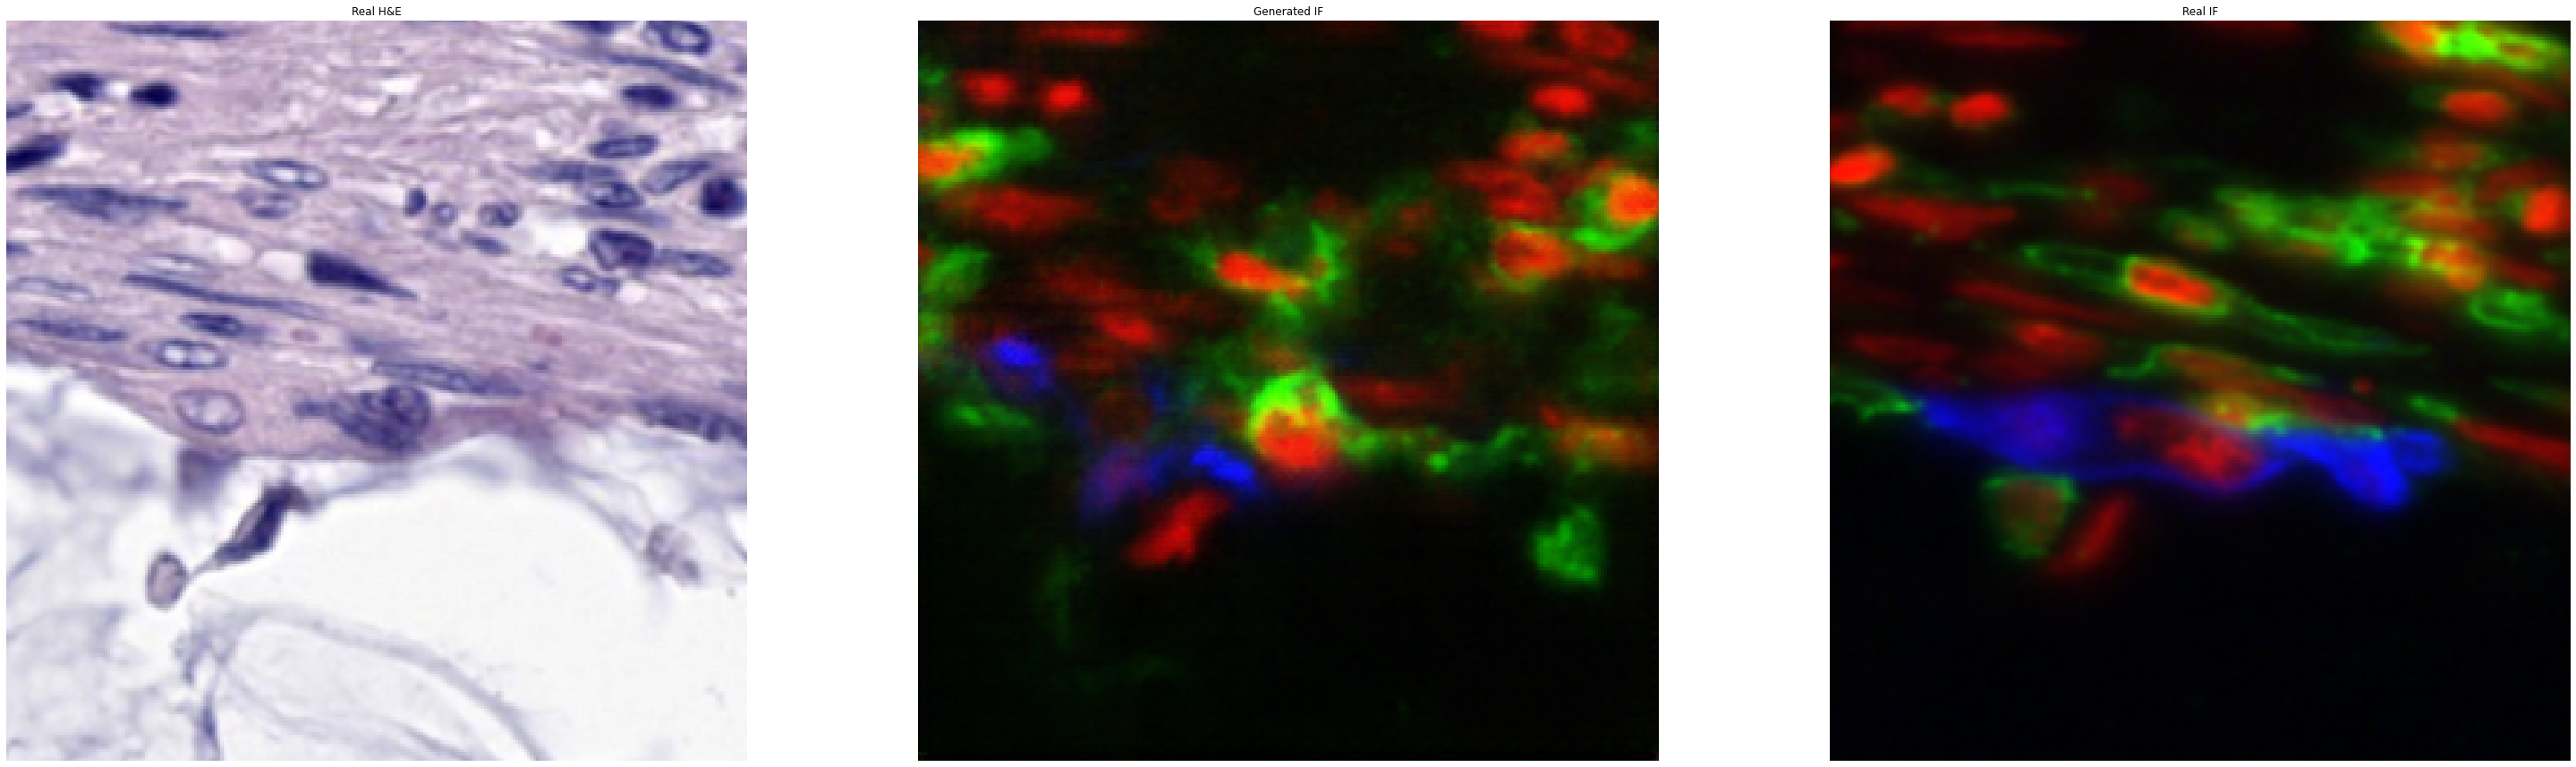

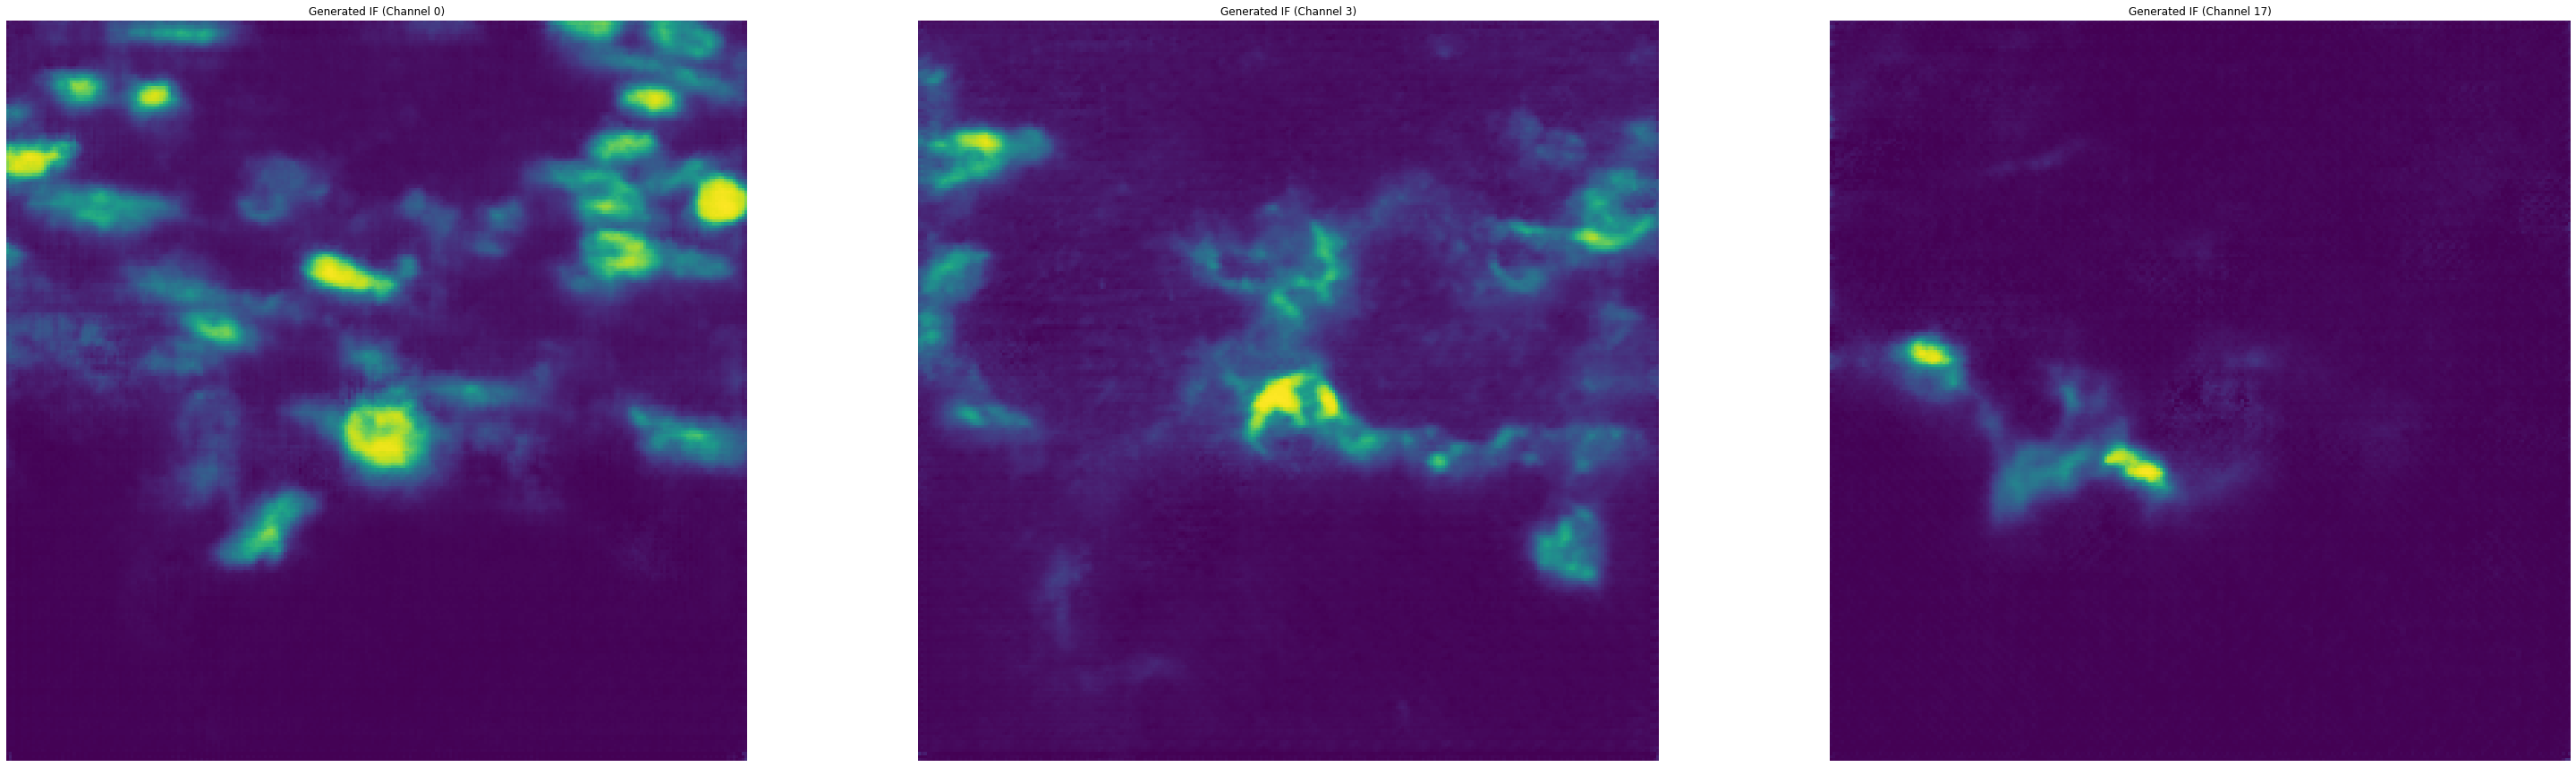

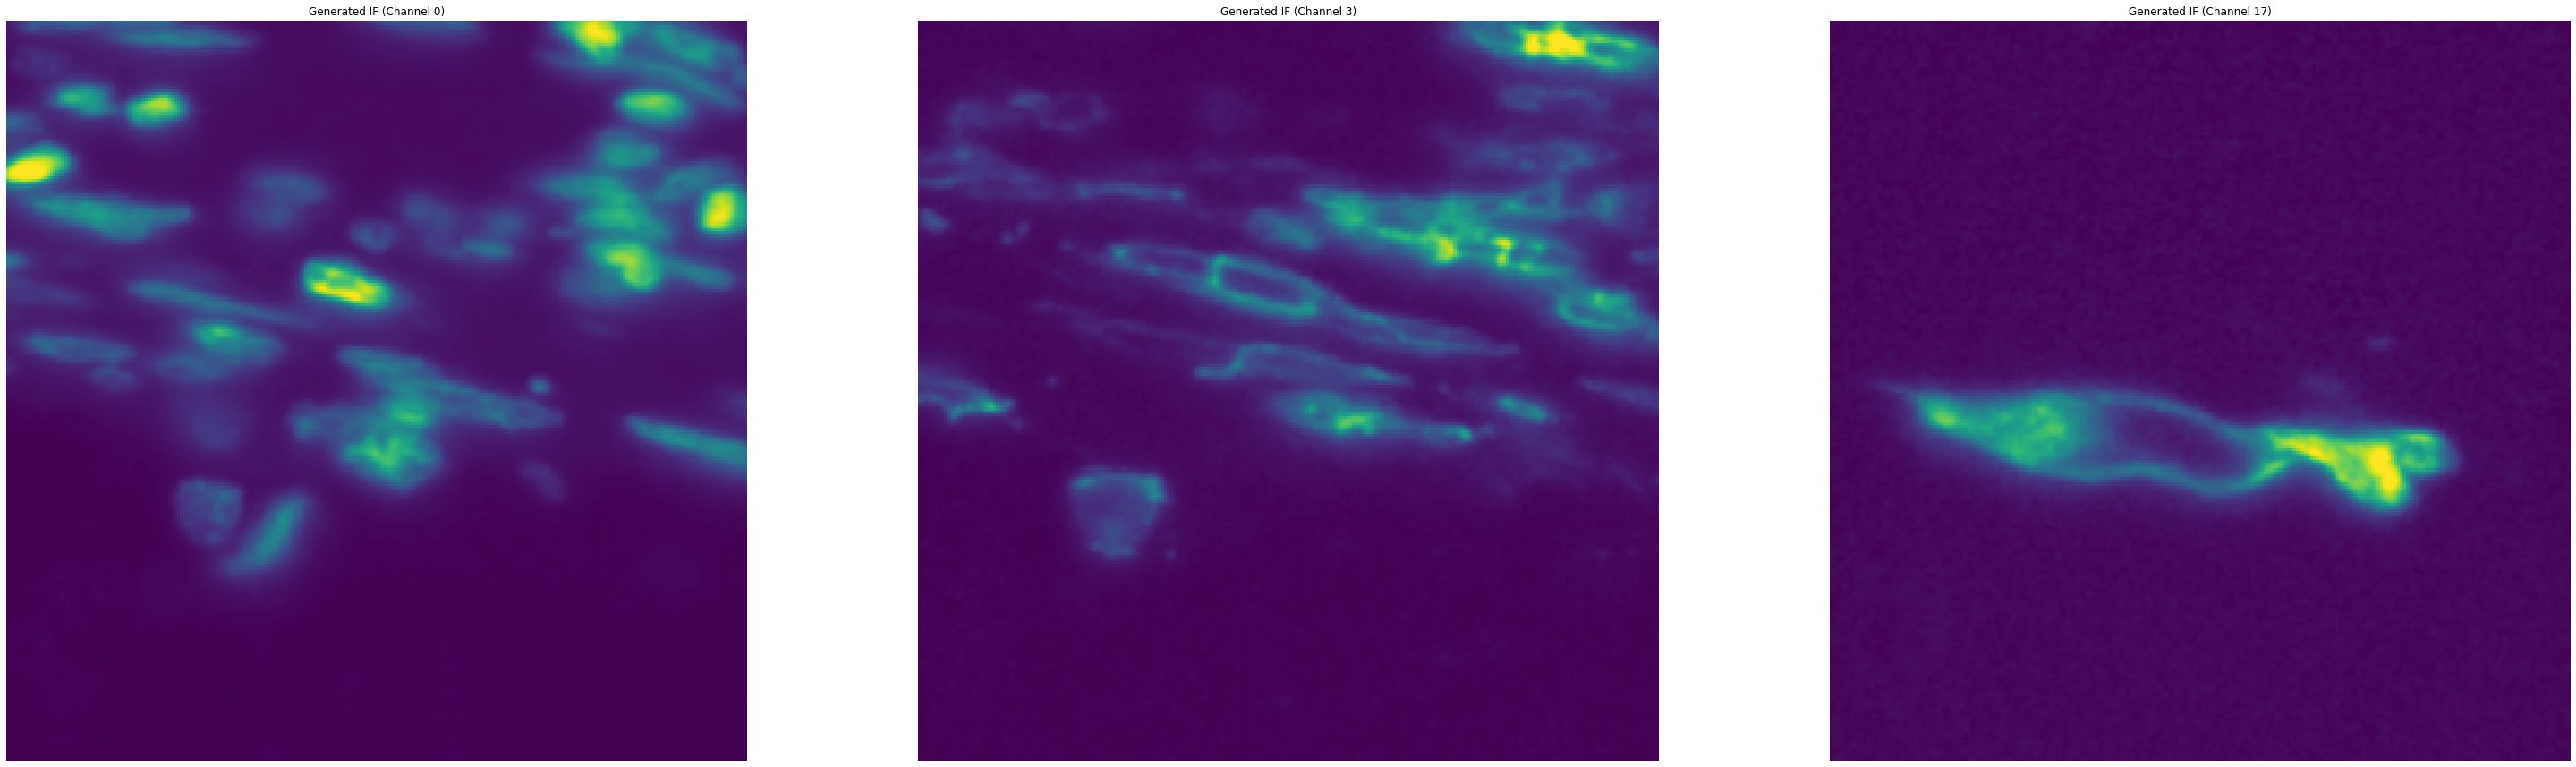

In [38]:
plot_resultsv1(path,3)

## Visualize testing results

CRC01-rs_50400-cs_74816_real_A.png
Aligned images:  ['CRC01-rs_50400-cs_74816_real_A.png', 'CRC01-rs_50400-cs_74816_fake_B.png', 'CRC01-rs_50400-cs_74816_real_B.png']
Range for HE]-> [(0, 255)]
Range for IF]-> [(0, 255)]
Range for Generated IF]-> [(0, 254)]
Range for Generated IF (stack)]-> [(0, 254)]
Range for Generated IF Channel 0]-> [(0, 252)]
Range for Generated IF Channel 3]-> [(0, 253)]
Range for Generated IF Channel 17]-> [(0, 254)]
Range for Real_IF  Channel 0]-> [(0, 255)]
Range for Real_IF  Channel 3]-> [(0, 255)]
Range for Real_IF  Channel 17]-> [(0, 255)]


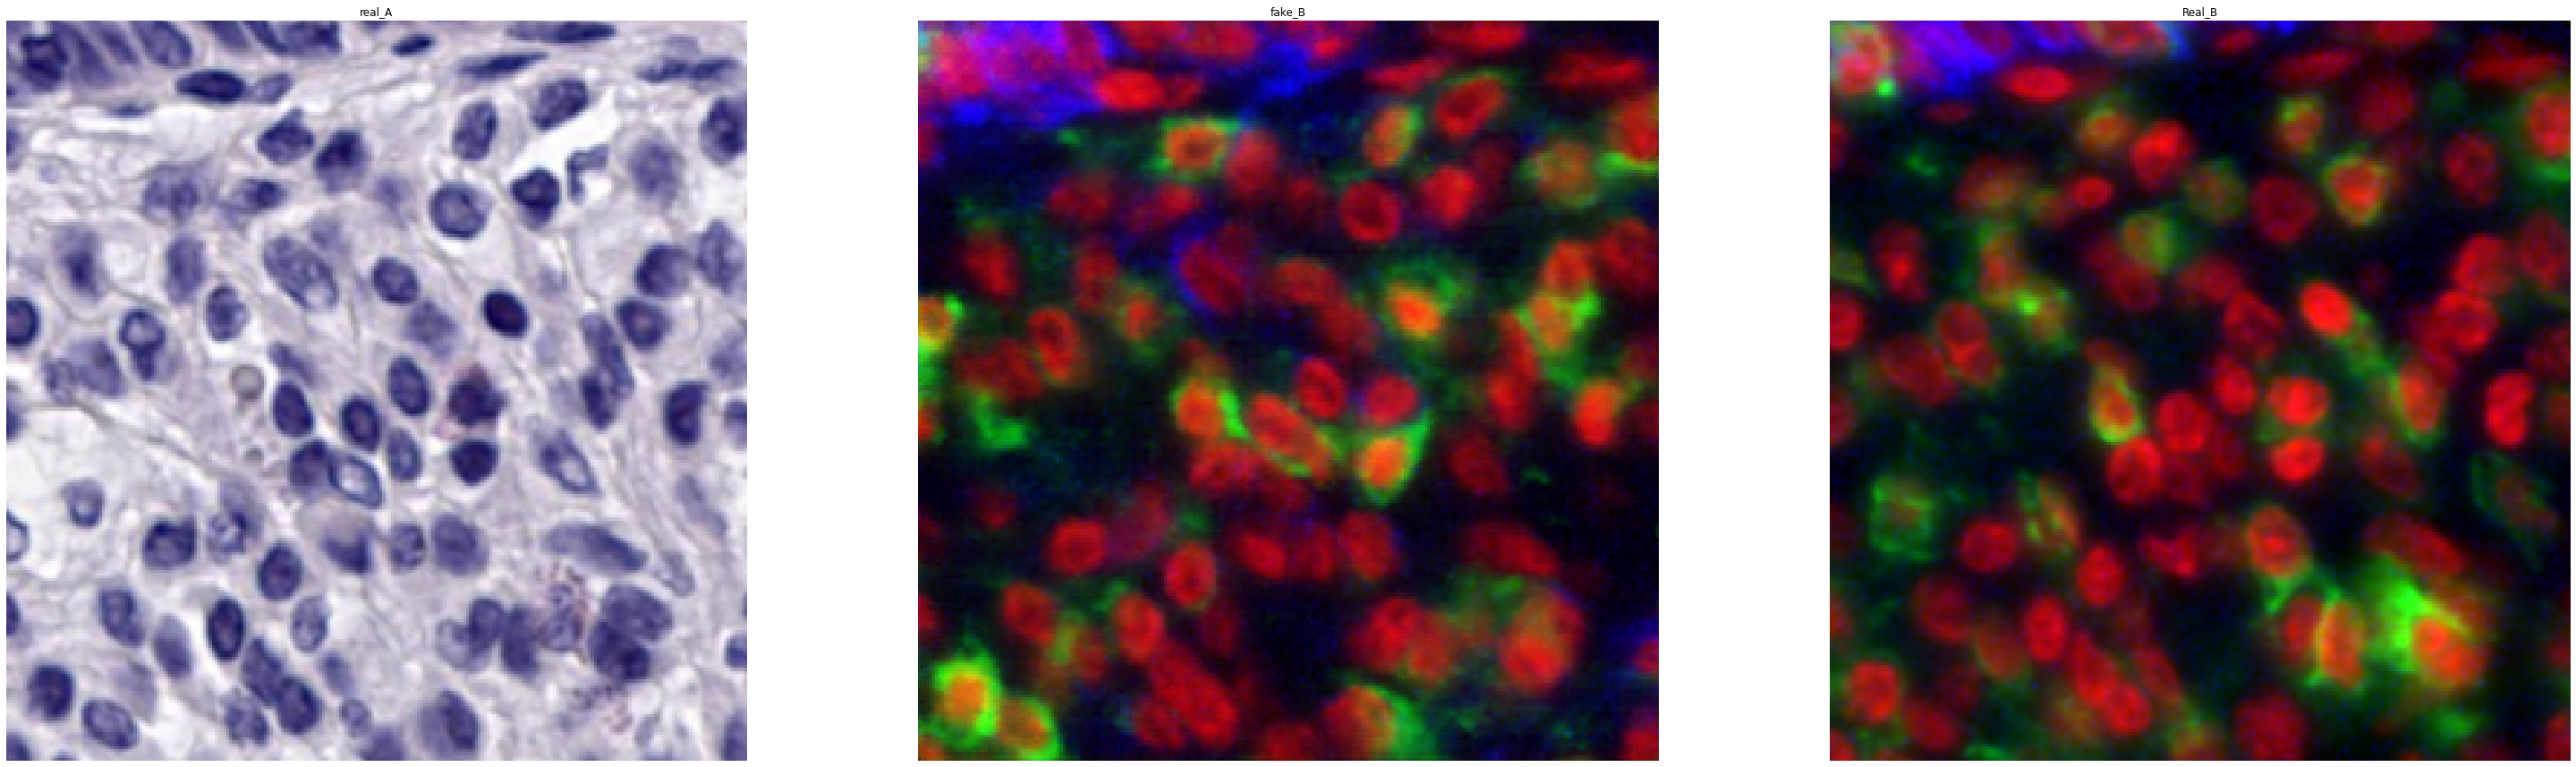

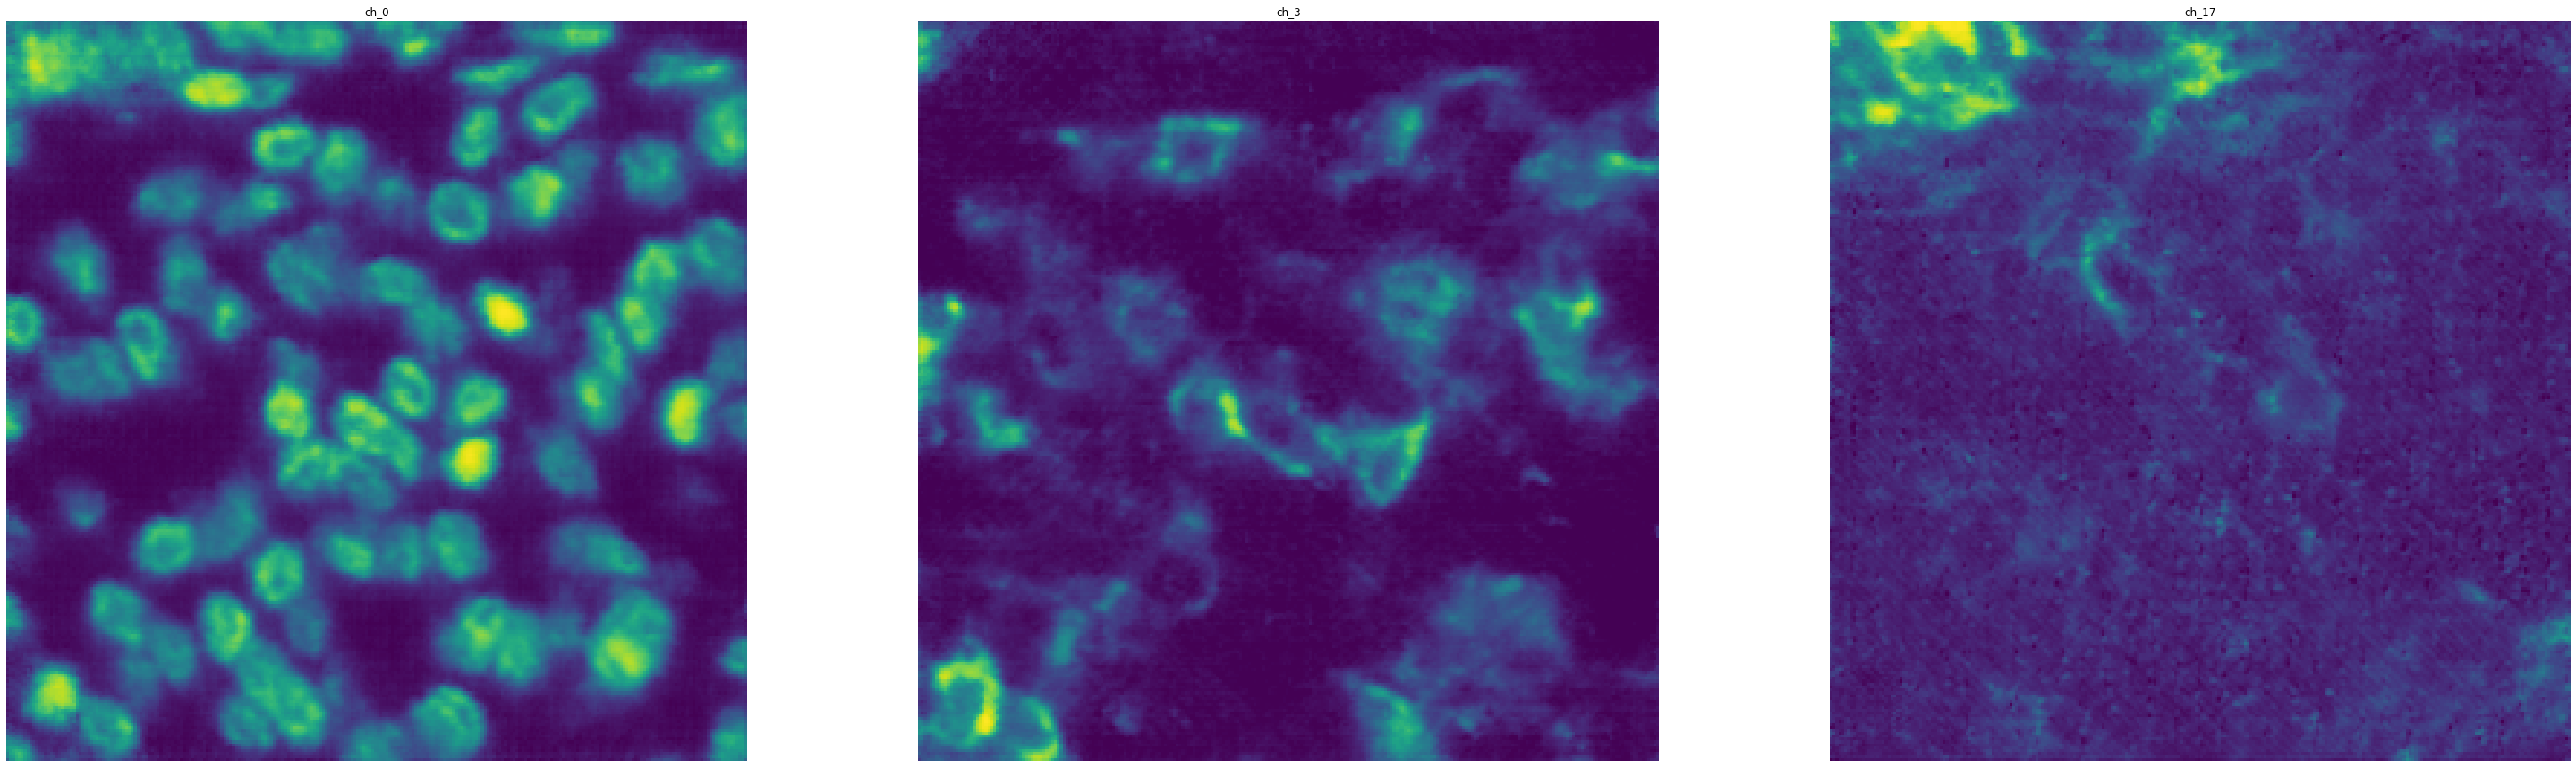

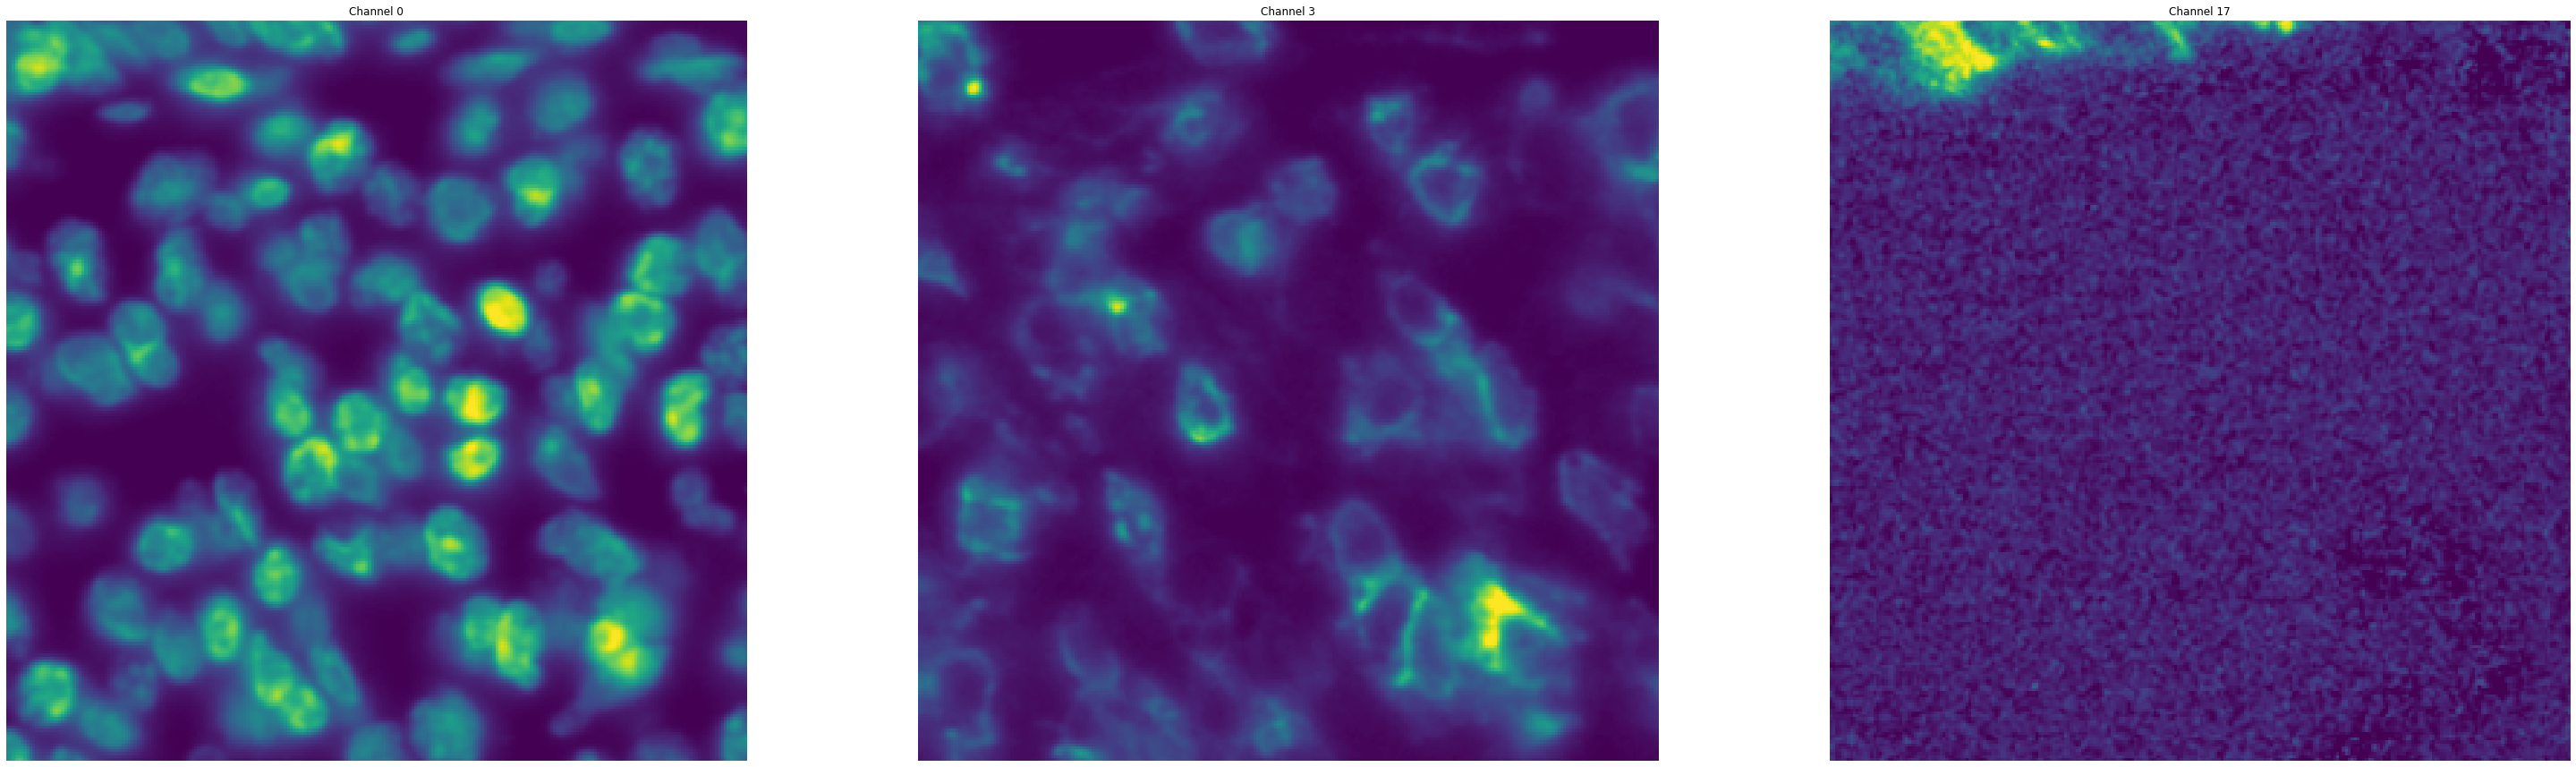

In [41]:
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix/tiff/vcg_augmented_horiz_v3_500_epochs/test_latest/images"
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix_dev/results_adapter_augmented_horiz_v4_500_epochs/adapter_augmented_horiz_v4_500_epochs/test_latest/images"
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix_dev/saver/vcg_augmented_horiz_v3_500_epochs/test_latest/images"
path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/pytorch-CycleGAN-and-pix2pix_dev/exp3/exp3_1/test_latest/images"

def plot_results(path,thr):
    idx =0
    for el in os.listdir(path)[:thr]:
        print(el)
        if ".png" in el:
            key = el[:-10]#png
            #key = "_"+matcher+"_"
            #"""
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["real_A", "fake_B", "Real_B"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["ch_0", "ch_3", "ch_17"])
            plot_imgs([Real_B[:,:,0], Real_B[:,:,1], Real_B[:,:,2]], ["Channel 0", "Channel 3", "Channel 17"])
            print(f"Range for HE]-> [{Real_A.min(), Real_A.max()}]")
            print(f"Range for IF]-> [{Real_B.min(), Real_B.max()}]")
            print(f"Range for Generated IF]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF (stack)]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF Channel 0]-> [{Fake_B[:,:,0].min(), Fake_B[:,:,0].max()}]")
            print(f"Range for Generated IF Channel 3]-> [{Fake_B[:,:,1].min(), Fake_B[:,:,1].max()}]")
            print(f"Range for Generated IF Channel 17]-> [{Fake_B[:,:,2].min(), Fake_B[:,:,2].max()}]")
            
            print(f"Range for Real_IF  Channel 0]-> [{Real_B[:,:,0].min(), Real_B[:,:,0].max()}]")
            print(f"Range for Real_IF  Channel 3]-> [{Real_B[:,:,1].min(), Real_B[:,:,1].max()}]")
            print(f"Range for Real_IF  Channel 17]-> [{Real_B[:,:,2].min(), Real_B[:,:,2].max()}]")
            #"""
            idx+=1
            if idx ==thr:
                break
        if ".tiff" in el:
            key = el[:-12]#png
            #print(key)
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["Real H&E", "Generated IF", "Real IF"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["Channel 0", "Channel 3", "Channel 17"])
            plot_imgs([Real_B[:,:,0], Real_B[:,:,1], Real_B[:,:,2]], ["Channel 0", "Channel 3", "Channel 17"])
            print(f"Range for HE]-> [{Real_A.min(), Real_A.max()}]")
            print(f"Range for IF]-> [{Real_B.min(), Real_B.max()}]")
            print(f"Range for Generated IF]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF (stack)]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF Channel 0]-> [{Fake_B[:,:,0].min(), Fake_B[:,:,0].max()}]")
            print(f"Range for Generated IF Channel 3]-> [{Fake_B[:,:,1].min(), Fake_B[:,:,1].max()}]")
            print(f"Range for Generated IF Channel 17]-> [{Fake_B[:,:,2].min(), Fake_B[:,:,2].max()}]")
            
            print(f"Range for Real_IF  Channel 0]-> [{Real_B[:,:,0].min(), Real_B[:,:,0].max()}]")
            print(f"Range for Real_IF  Channel 3]-> [{Real_B[:,:,1].min(), Real_B[:,:,1].max()}]")
            print(f"Range for Real_IF  Channel 17]-> [{Real_B[:,:,2].min(), Real_B[:,:,2].max()}]")
            idx+=1
            if idx == thr:
                break
            
plot_results(path_results,1)

## Adding exposure to infered images

Aligned images:  ['CRC01-rs_5152-cs_27328_real_A.png', 'CRC01-rs_5152-cs_27328_fake_B.png', 'CRC01-rs_5152-cs_27328_real_B.png']
Range for HE]-> [(0, 255)]
Range for IF]-> [(0, 255)]
Range for Generated IF (stack)]-> [(0, 255)]
Range for Generated IF Channel 0]-> [(0, 255)]
Range for Generated IF Channel 3]-> [(0, 255)]
Range for Generated IF Channel 17]-> [(0, 255)]
Range for Real_IF  Channel 0]-> [(0, 255)]
Range for Real_IF  Channel 3]-> [(0, 255)]
Range for Real_IF  Channel 17]-> [(0, 255)]


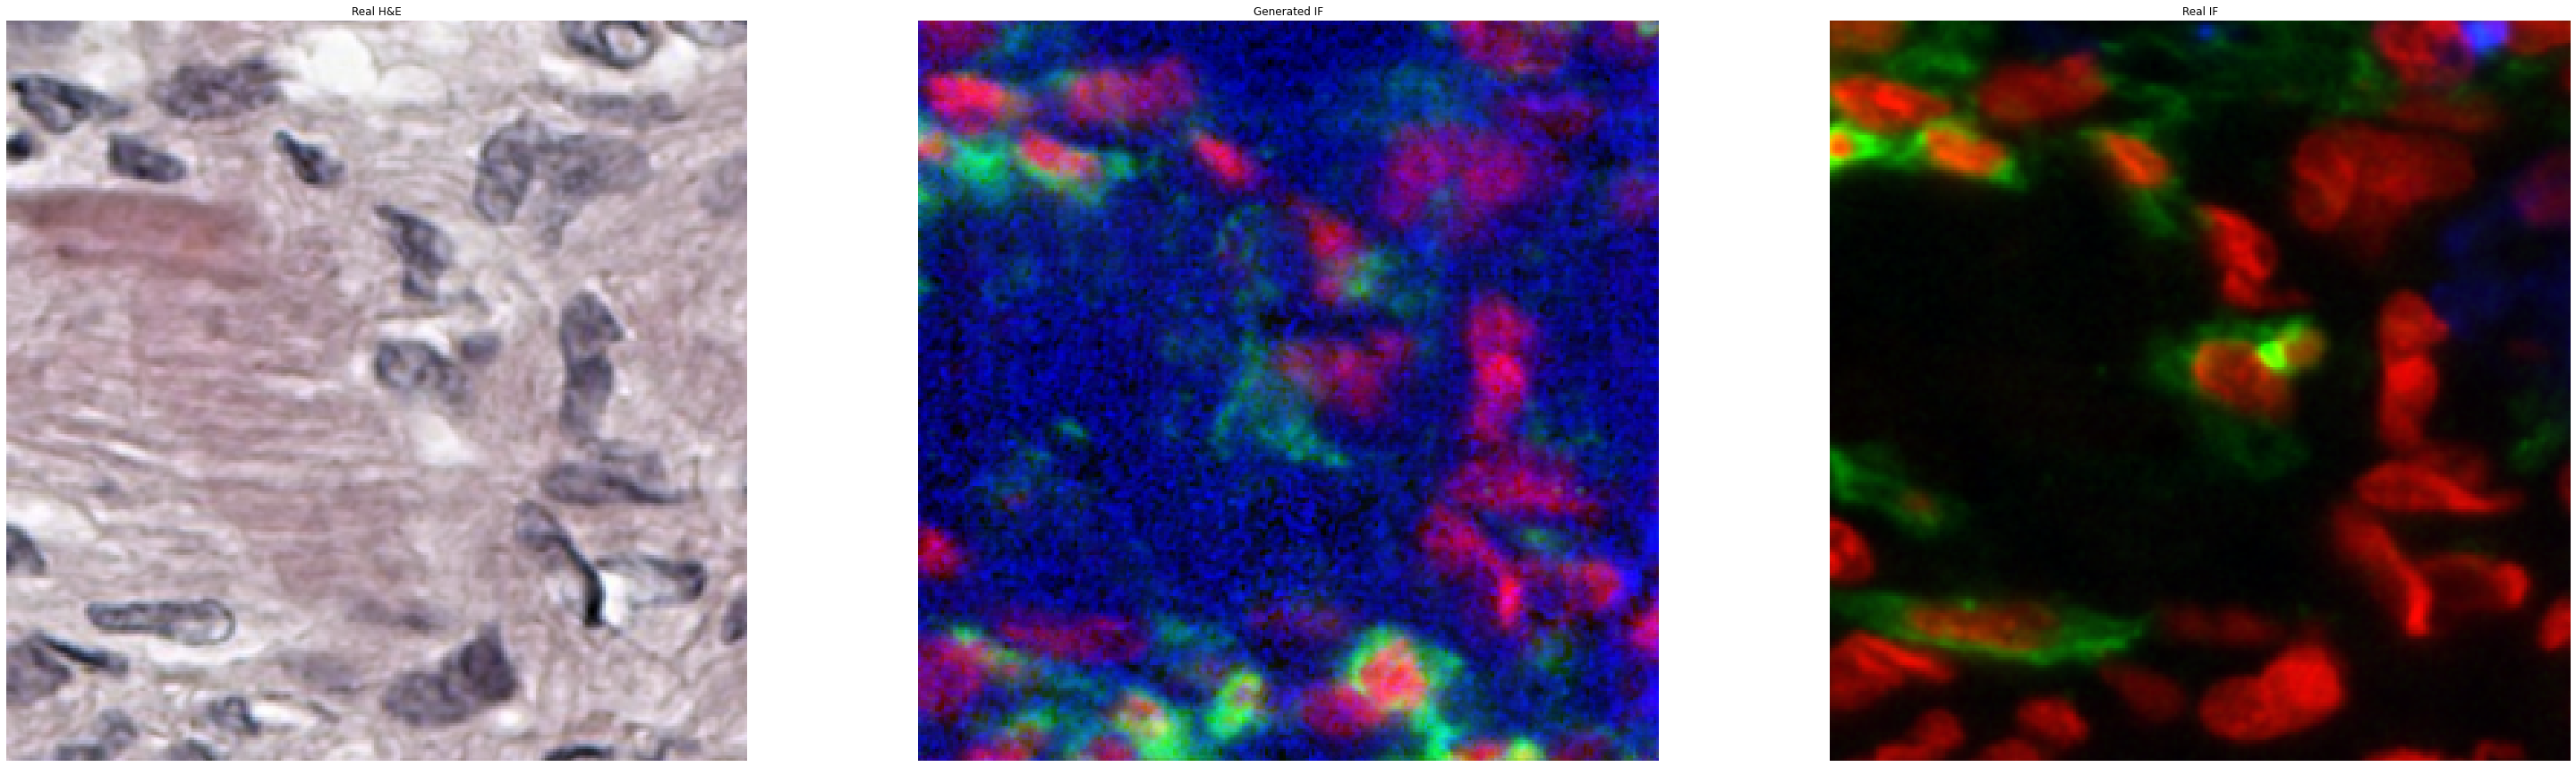

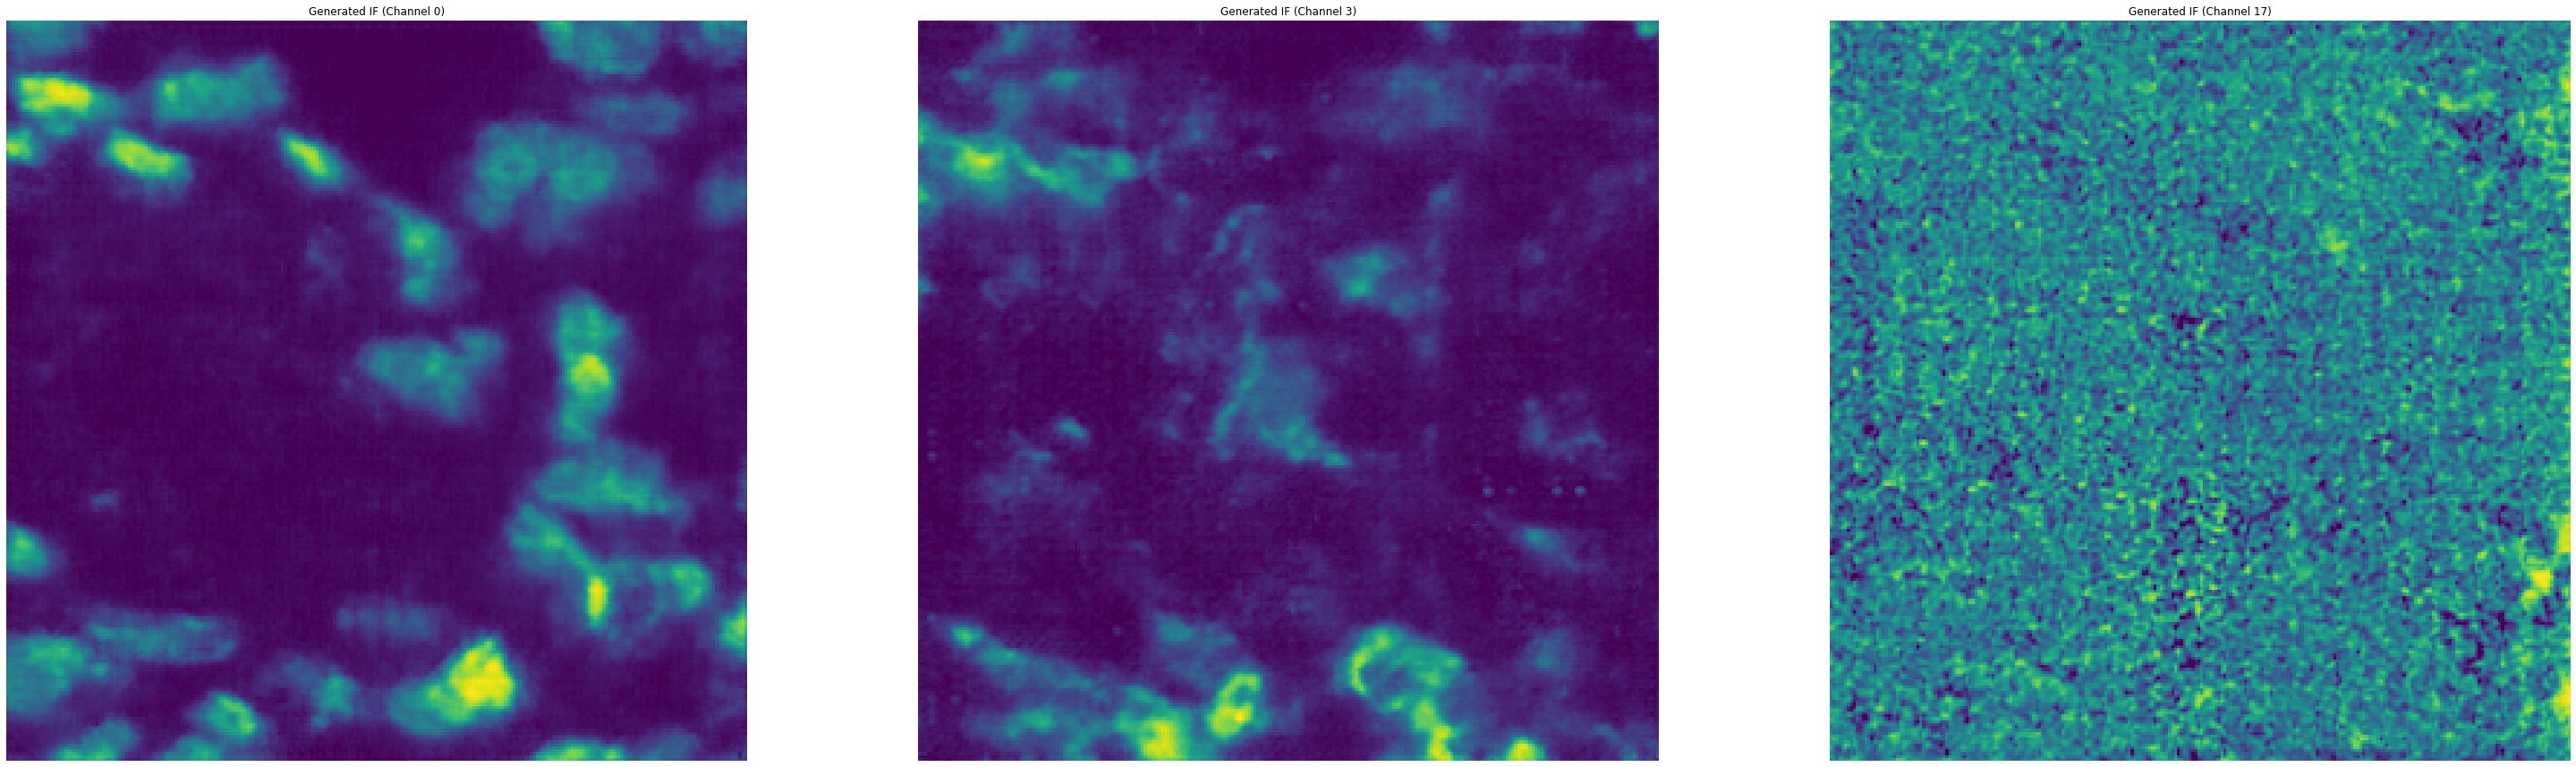

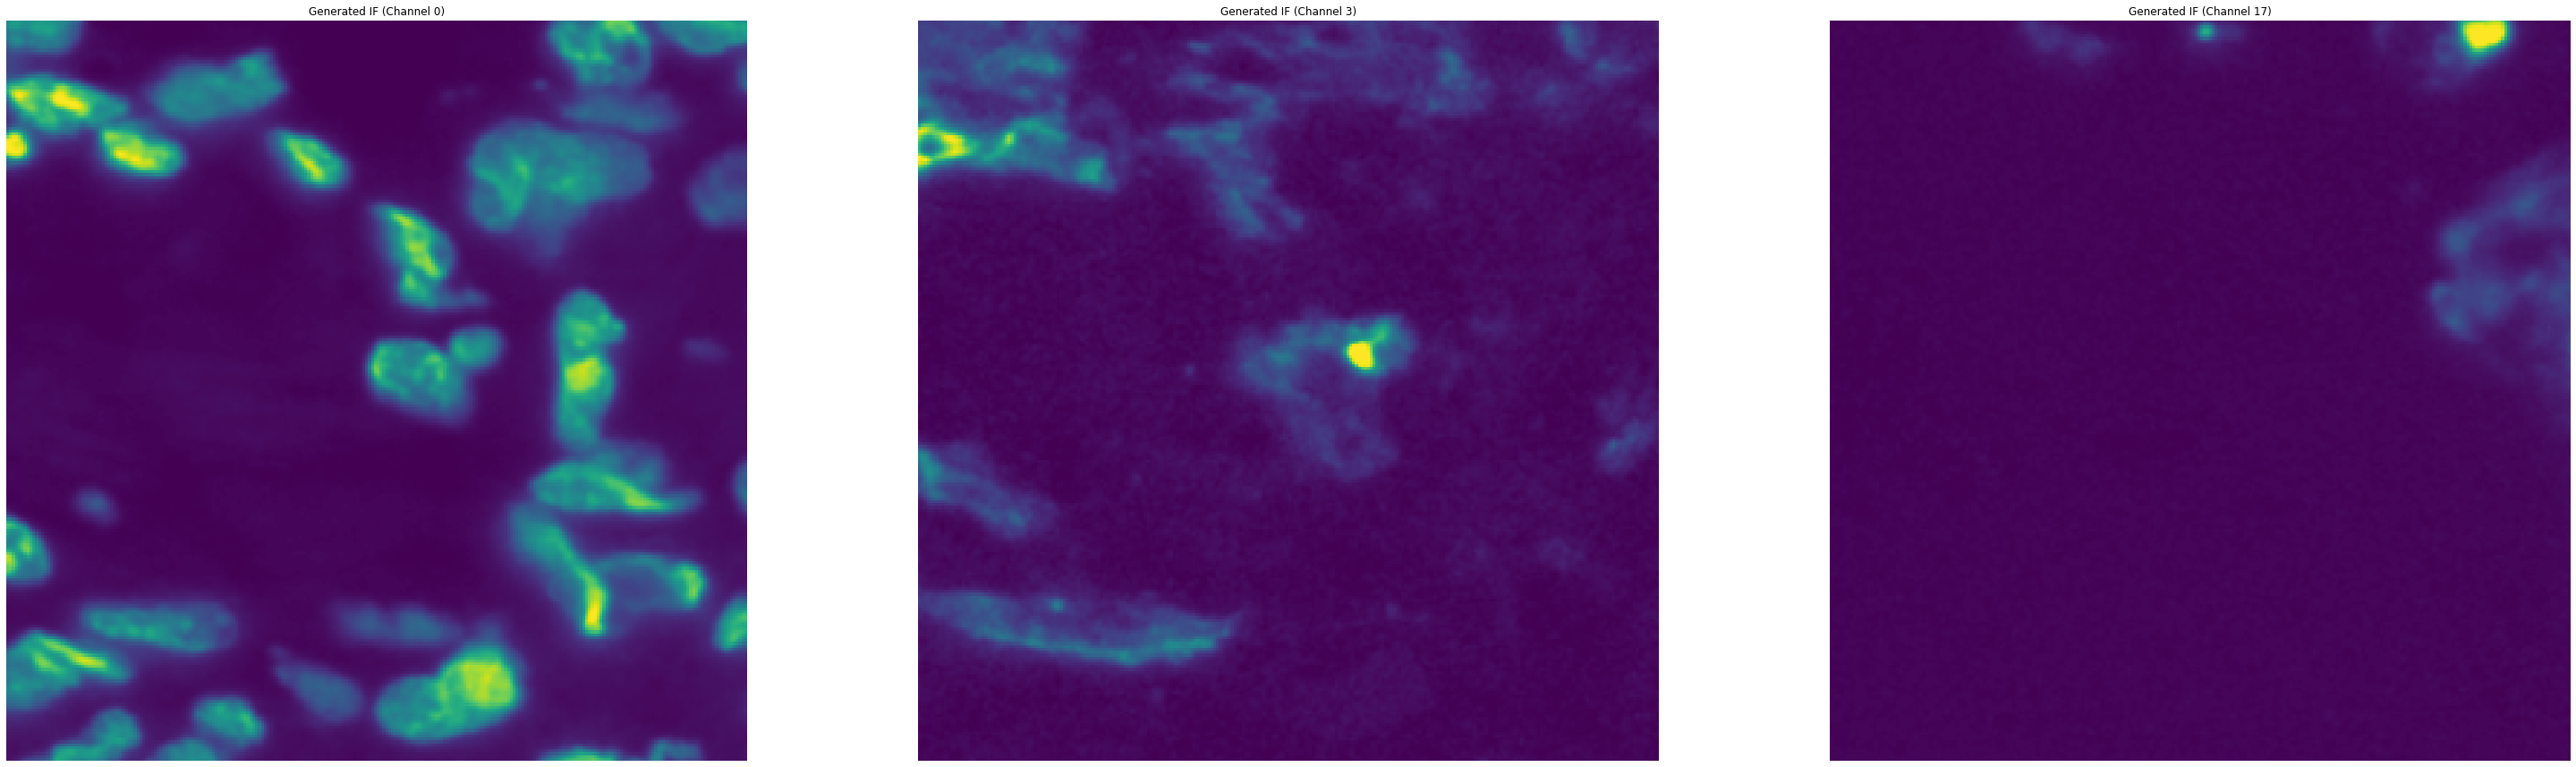

<Figure size 64.08x64.08 with 0 Axes>

In [42]:
SAVER = True
import skimage.exposure
def plot_resultsv2(path,thr):
    idx =0
    for el in reversed(os.listdir(path)):
        if ".png" in el:
            matcher = el.split("_")[2]
            key = "_"+matcher+"_"
            list_of_images = return_list_of_matches(key, os.listdir(path))
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            
            CHANNELS= range(3)
            Real_A = np.dstack([
                skimage.exposure.rescale_intensity(Real_A[:,:,c], out_range=(0, 255)) 
                for c in CHANNELS
            ])
            Fake_B = np.dstack([
                skimage.exposure.rescale_intensity(Fake_B[:,:,c], out_range=(0, 255)) 
                for c in CHANNELS
            ])
            Real_B = np.dstack([
                skimage.exposure.rescale_intensity(Real_B[:,:,c], out_range=(0, 255)) 
                for c in CHANNELS
            ])
            
            plot_imgs([Real_A, Fake_B, Real_B], ["Real H&E", "Generated IF", "Real IF"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["Generated IF (Channel 0)", "Generated IF (Channel 3)", "Generated IF (Channel 17)"])
            plot_imgs([Real_B[:,:,0], Real_B[:,:,1], Real_B[:,:,2]], ["Generated IF (Channel 0)", "Generated IF (Channel 3)", "Generated IF (Channel 17)"])
            print(f"Range for HE]-> [{Real_A.min(), Real_A.max()}]")
            print(f"Range for IF]-> [{Real_B.min(), Real_B.max()}]")
            print(f"Range for Generated IF (stack)]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF Channel 0]-> [{Fake_B[:,:,0].min(), Fake_B[:,:,0].max()}]")
            print(f"Range for Generated IF Channel 3]-> [{Fake_B[:,:,1].min(), Fake_B[:,:,1].max()}]")
            print(f"Range for Generated IF Channel 17]-> [{Fake_B[:,:,2].min(), Fake_B[:,:,2].max()}]")
            
            print(f"Range for Real_IF  Channel 0]-> [{Real_B[:,:,0].min(), Real_B[:,:,0].max()}]")
            print(f"Range for Real_IF  Channel 3]-> [{Real_B[:,:,1].min(), Real_B[:,:,1].max()}]")
            print(f"Range for Real_IF  Channel 17]-> [{Real_B[:,:,2].min(), Real_B[:,:,2].max()}]")
            visualization_path  = "viz"
            os.makedirs(visualization_path, exist_ok=True)
            if SAVER:
                fig = plt.figure(figsize=(50, 50))
                path = os.path.join(visualization_path, f"plots_{idx}.png")
                plt.savefig(path, bbox_inches='tight', pad_inches=0)#, dpi = 64)
                w = 0.89
                h = 0.89
                fig.set_size_inches(w,h)
                plt.show()
                plt.close('all')
                idx+=1
            if idx ==thr:
                break
plot_resultsv2(path_results,1)

In [20]:
img = util.img_as_float(io.imread(file))

['real_A_3_e8e33ce27c3ede059ab0.png',
 'fake_B_3_807af8091c269d2d2033.png',
 'real_B_3_80ebd695c53f66dee4ad.png']